In [1]:
## Daniele Campisi - 03/06/2024
## Import delle dipendenze

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

ModuleNotFoundError: No module named 'numpy'

In [7]:
#Caricamento del dataset

num_task = 11
df = pd.read_csv("Task_{}_clean.csv".format(num_task))

In [10]:
df

,Id,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),...,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Gender,Age,Dominant_Hand,Label,Task
0,1,0.941176,1.939393,2.0,0.539890,0.889698,2.0,1.272266,12.989940,2.0,...,24.505,25.200,36.036765,11.936170,0.079365,0,6.0,0,1,11
1,2,0.554197,1.699309,2.0,0.492917,0.866389,2.0,0.942135,5.561459,2.0,...,25.765,31.975,4.199674,14.000000,0.437842,1,6.0,0,1,11
2,3,1.431453,7.981108,2.0,0.755661,1.020492,2.0,1.325316,5.257729,2.0,...,18.990,18.995,28.525843,11.909091,0.394176,0,6.0,0,1,11
3,4,1.191803,4.646091,2.0,0.738685,1.017430,2.0,1.022951,4.012619,2.0,...,18.560,24.765,3.042623,20.000000,0.807591,1,6.0,1,0,11
4,5,1.203679,7.271267,2.0,0.825959,1.008418,2.0,1.096593,5.194738,2.0,...,15.255,15.260,26.049698,12.823529,0.447941,1,6.0,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,141,0.535714,0.901671,2.0,0.726223,1.065904,2.0,0.828571,1.158465,2.0,...,18.190,19.615,12.992857,4.000000,0.203926,0,6.0,0,2,11
115,142,1.203679,7.271267,2.0,0.806359,1.051167,2.0,1.125161,5.336005,2.0,...,15.725,15.805,20.078176,12.296296,0.126542,1,6.0,0,0,11
116,143,1.203679,7.271267,2.0,1.742432,2.171070,2.0,1.096593,5.194738,2.0,...,9.745,9.750,26.049698,12.823529,0.447941,1,6.0,0,0,11
117,144,1.441662,9.626876,2.0,0.905213,1.052363,2.0,1.150242,4.980676,2.0,...,14.770,14.775,18.845249,7.428571,0.263346,1,7.0,0,2,11


In [11]:
#Contiamo il numero di occorrenze della colonna target Label

df["Label"].value_counts(dropna = False)

Label
1    55
0    34
2    30
Name: count, dtype: int64

In [12]:
#Drop delle colonne Label (per la classificazione) 

#Id che non serve per la classificazione e la colonna task

y = df['Label']
X = df.drop(columns=['Label', 'Id', 'Task'])

In [14]:
X.head()

,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),mean:velocity:axis-y(on-surface),...,std:ratio_of_stroke_durations,iqr:ratio_of_stroke_durations,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Gender,Age,Dominant_Hand
0,0.941176,1.939393,2.0,0.539890,0.889698,2.0,1.272266,12.989940,2.0,1.799633,...,2.574561,2.379897,24.505,25.200,36.036765,11.936170,0.079365,0,6.0,0
1,0.554197,1.699309,2.0,0.492917,0.866389,2.0,0.942135,5.561459,2.0,0.830196,...,2.065927,1.499958,25.765,31.975,4.199674,14.000000,0.437842,1,6.0,0
2,1.431453,7.981108,2.0,0.755661,1.020492,2.0,1.325316,5.257729,2.0,1.412322,...,2.574561,2.379897,18.990,18.995,28.525843,11.909091,0.394176,0,6.0,0
3,1.191803,4.646091,2.0,0.738685,1.017430,2.0,1.022951,4.012619,2.0,1.570582,...,0.780030,0.635967,18.560,24.765,3.042623,20.000000,0.807591,1,6.0,1
4,1.203679,7.271267,2.0,0.825959,1.008418,2.0,1.096593,5.194738,2.0,0.926909,...,3.308811,3.111200,15.255,15.260,26.049698,12.823529,0.447941,1,6.0,1


In [15]:
# Dividere il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Stiamo dividendo il dataset al 30%, usiamo quindi per il train il 70% dei campioni mentre per il test il 30%



In [16]:
# Inizializzare il classificatore Decision Tree (Usa Gini di base)
clf = DecisionTreeClassifier(random_state=42)

In [17]:
# Addestrare il modello sui dati di training
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Fare delle predizioni sui dati di test
y_pred = clf.predict(X_test)

In [19]:
# Valutare le performance del modello
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8611111111111112
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.83      1.00      0.91        20
           2       1.00      0.86      0.92         7

    accuracy                           0.86        36
   macro avg       0.89      0.80      0.83        36
weighted avg       0.87      0.86      0.85        36

Confusion Matrix:
[[ 5  4  0]
 [ 0 20  0]
 [ 1  0  6]]


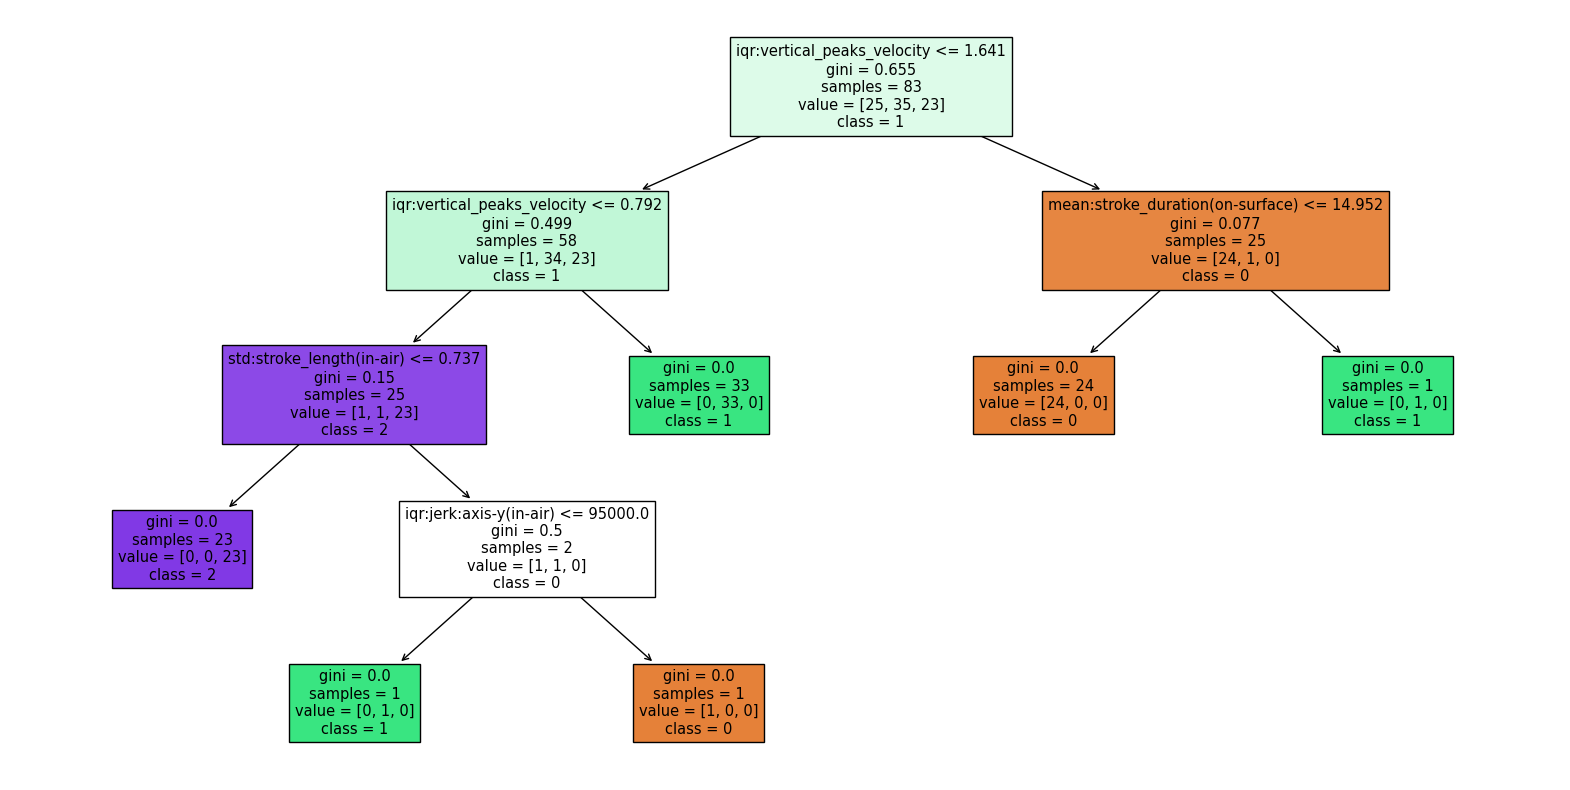

In [21]:
# Visualizzare l'albero decisionale
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in clf.classes_], filled=True)
plt.show()